<a href="https://colab.research.google.com/github/Karagiannis-Giorg/Classification-on-a-5G-Network---UNSW-NB15-Dataset/blob/main/CEID_5G_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Το πρόβλημα**

Η συνεχής εξέλιξη των τηλεπικοινωνιακών δικτύων, και ειδικότερα των δικτύων πέμπτης γενιάς (5G), έχει φέρει επανάσταση στις δυνατότητες συνδεσιμότητας και στην ταχύτητα μεταφοράς δεδομένων. Ωστόσο, παράλληλα με τα οφέλη, αυτή η εξέλιξη συνοδεύεται και από αυξημένες προκλήσεις στον τομέα της κυβερνοασφάλειας. Οι επιθέσεις στα δίκτυα γίνονται όλο και πιο εξελιγμένες, με τους κακόβουλους παράγοντες να χρησιμοποιούν σύγχρονες τεχνικές για την παράκαμψη των μέτρων ασφαλείας.

Ένα από τα πιο σημαντικά εργαλεία για την προστασία των δικτύων είναι τα Συστήματα Ανίχνευσης Εισβολών (Intrusion Detection Systems – IDS), τα οποία έχουν ως στόχο να αναγνωρίζουν και να αποκλείουν κακόβουλες δραστηριότητες που μπορούν να επηρεάσουν την ασφάλεια ενός συστήματος. Τα IDS διακρίνονται σε δύο βασικές κατηγορίες:

*   Συστήματα ανίχνευσης εισβολών βασισμένα σε υπογραφές (Signature-based IDS): Ανιχνεύουν γνωστές απειλές συγκρίνοντας την εισερχόμενη δικτυακή κίνηση με μια βάση δεδομένων που περιέχει γνωστά μοτίβα επιθέσεων. Ωστόσο, αυτά τα συστήματα είναι αδύναμα απέναντι σε νέες, άγνωστες απειλές.
*   Συστήματα ανίχνευσης ανωμαλιών (Anomaly-based IDS): Μαθαίνουν τη φυσιολογική συμπεριφορά του δικτύου και χαρακτηρίζουν ως επίθεση οποιαδήποτε απόκλιση από αυτή τη συμπεριφορά. Αυτή η προσέγγιση μπορεί να εντοπίσει νέες απειλές, αλλά απαιτεί ισχυρούς αλγορίθμους μηχανικής μάθησης και βαθιάς μάθησης (Machine Learning & Deep Learning).

Για να μπορέσουν τα IDS να είναι αξιόπιστα, απαιτούνται σύγχρονα και αντιπροσωπευτικά σύνολα δεδομένων (datasets), τα οποία περιέχουν τόσο κανονική δικτυακή δραστηριότητα όσο και διάφορους τύπους επιθέσεων. Εδώ έρχεται να καλύψει το κενό το σύνολο δεδομένων UNSW-NB15, το οποίο χρησιμοποιούμε σε αυτή την εργασία.

https://ieeexplore.ieee.org/abstract/document/7348942

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Βιβλιοθήκες

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
import matplotlib.pyplot as plt
import joblib

## **Εισαγωγή δεδομένων**


In [ ]:
training_data = pd.read_csv('/content/gdrive/MyDrive/5G/Datasets/UNSW_NB15_training-set.csv')
test_data = pd.read_csv('/content/gdrive/MyDrive/5G/Datasets/UNSW_NB15_testing-set.csv')
NB15_features = pd.read_csv('/content/gdrive/MyDrive/5G/NUSW-NB15_features.csv', encoding='cp1252')

## **Χαρακτηριστικά**

In [ ]:
NB15_features

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol
5,6,state,nominal,Indicates to the state and its dependent proto...
6,7,dur,Float,Record total duration
7,8,sbytes,Integer,Source to destination transaction bytes
8,9,dbytes,Integer,Destination to source transaction bytes
9,10,sttl,Integer,Source to destination time to live value


## **Προεπεξεργασία**

### Τύποι δεδομένων χαρακτηριστικών

In [ ]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

In [ ]:
training_data.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [ ]:
round(training_data.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
id,175341.0,8.767100e+04,5.061673e+04,1.0,43836.00,87671.00,1.315060e+05,1.753410e+05
dur,175341.0,1.360000e+00,6.480000e+00,0.0,0.00,0.00,6.700000e-01,6.000000e+01
spkts,175341.0,2.030000e+01,1.368900e+02,1.0,2.00,2.00,1.200000e+01,9.616000e+03
dpkts,175341.0,1.897000e+01,1.102600e+02,0.0,0.00,2.00,1.000000e+01,1.097400e+04
sbytes,175341.0,8.844840e+03,1.747656e+05,28.0,114.00,430.00,1.418000e+03,1.296523e+07
dbytes,175341.0,1.492892e+04,1.436542e+05,0.0,0.00,164.00,1.102000e+03,1.465555e+07
rate,175341.0,9.540619e+04,1.654010e+05,0.0,32.79,3225.81,1.250000e+05,1.000000e+06
sttl,175341.0,1.795500e+02,1.029400e+02,0.0,62.00,254.00,2.540000e+02,2.550000e+02
dttl,175341.0,7.961000e+01,1.105100e+02,0.0,0.00,29.00,2.520000e+02,2.540000e+02
sload,175341.0,7.345403e+07,1.883574e+08,0.0,13053.34,879674.75,8.888889e+07,5.988000e+09


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

Τα χαρακτηριστικά που λείπουν είναι τα ακόλουθα:
*   srcip (Categorical): Source IP address
*   sport (Numerical): Source port number
*   dstip (Categorical): Destination IP address
*   dsport (Numerical): Destination port number

Τα χαρακτηριστικά αυτά δεν προσφέρουν κάποια σημαντική πληροφορία σχετικά με την αναγνώριση εισβολών, αφού για κάθε σύνδεση έχουμε διαφορετικές ip διευθύνσεις.

Στην συνέχεια παρατηρούμε τους εξής τύπους δεδομένων:
*   Numerical: int64, float64
*   Categorical: object

Με βάση το paper τα χαρακτηριστικά **is_sm_ips_ports** & **is_ftp_login** είναι Boolean ενώ εδώ εμφανίζονται σαν Integers.


In [ ]:
training_data['is_sm_ips_ports'].unique()

array([0, 1])

In [ ]:
test_data['is_sm_ips_ports'].unique()

array([0, 1])

In [ ]:
training_data['is_ftp_login'].unique()

array([0, 1, 2, 4])

In [ ]:
test_data['is_ftp_login'].unique()

array([0, 1, 2])

Παρατηρείται ότι το χαρακτηριστικό **is_ftp_login** δεν περιέχει τις σωστές τιμές, κανονικά θα έπρεπε να περιέχει τις τιμές 0,1 οι οποίες αντισοτιχίζονται σε Boolean (F-T). Εδώ όμως περιέχονται και οι τιμές 0,1,2 (ή/και) 4 άρα αντικαθιστούμε το 2 και 4.

In [ ]:
training_data['is_ftp_login'] = training_data['is_ftp_login'].replace({2: 1, 4: 1})
training_data['is_ftp_login'].unique()

array([0, 1])

In [ ]:
test_data['is_ftp_login'] = test_data['is_ftp_login'].replace({2: 1})
test_data['is_ftp_login'].unique()

array([0, 1])

Άρα οι τιμές των χαρακτηριστικών αυτών θα παραμείνουν ως integer με τισ τιμές 0,1 αφού όλο το dataset θα μετατραπεί σε αριθμιτικές τιμές




## **Έλεγχος κατανομής των Label στο Training set**

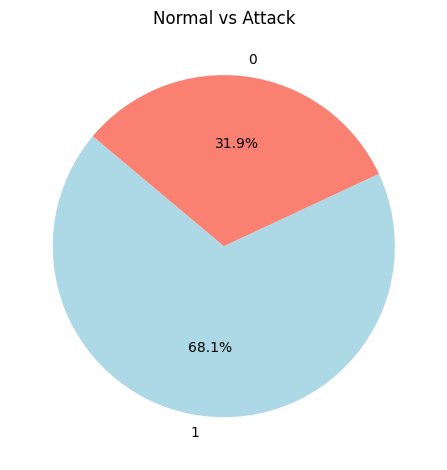

In [ ]:
# Επιλογή του feature Label απο το train dataset
train_label_counts = training_data['label'].value_counts()

# Pie chart για τα training data
fig = figsize=(12, 6)
plt.pie(train_label_counts, labels=train_label_counts.index, autopct='%1.1f%%',
            colors=['lightblue', 'salmon'], startangle=140)
plt.title('Normal vs Attack')

plt.tight_layout()
plt.show()

Αυτή η ανισορροπία μπορεί να επηρεάσει την απόδοση του μοντέλου, καθώς μπορεί να τείνει να προβλέπει περισσότερο την κατηγορία 1 και να έχει χαμηλότερη ακρίβεια στην κατηγορία 0.

## **Έλεγχος για ελλιπείς τιμές ή διπλότυπες εγγραφές**

In [ ]:
# Έλεγχος ελλειπών τιμών
print("Ελλιπείς τιμές στο training set:\n", training_data.isnull().sum())
print("\nΕλλιπείς τιμές στο test set:\n", test_data.isnull().sum())

# Έλεγχος διπλότυπων εγγραφών
print("\nΔιπλότυπες εγγραφές στο training set:", training_data.duplicated().sum())
print("Διπλότυπες εγγραφές στο test set:", test_data.duplicated().sum())

Ελλιπείς τιμές στο training set:
 id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0


 **Διαγραφή χαρακηριστικών που δεν χρειαζόμαστε:**
Το **id** δεν μας προσφέρει κάποια πληροφορία για την ταξινόμηση της πρόσβασης.

Το **attack_cat** (τύπος επίθεσης) δεν το χρειαζόμαστε αφού θα επικεντρωθούμε στην binary κατηγορηοποίηση της πρόσβασης σε 0,1 όπου:


*   0 -> Normal
*   1 -> Attack



In [ ]:
training_data.drop(['id', 'attack_cat'], axis=1,inplace=True)
test_data.drop(['id', 'attack_cat'], axis=1,inplace=True)

## **Correlation**

### Η ανάλυση συσχέτισης (correlation) θα πραγματοποιηθεί στα αριθμητικά χαρακτηριστικά του training dataset. Στόχος είναι ο εντοπισμός ομάδων χαρακτηριστικών με συσχέτιση μεγαλύτερη του 0.99, σε απόλυτη τιμή, καθώς τέτοια χαρακτηριστικά έχουν σχεδόν ταυτόσημη επίδραση στο μοντέλο. Σε αυτές τις περιπτώσεις, διατηρείται μόνο ένα χαρακτηριστικό από κάθε ομάδα και τα υπόλοιπα διαγράφονται, ώστε να μειωθεί η πολυπλοκότητα του μοντέλου.

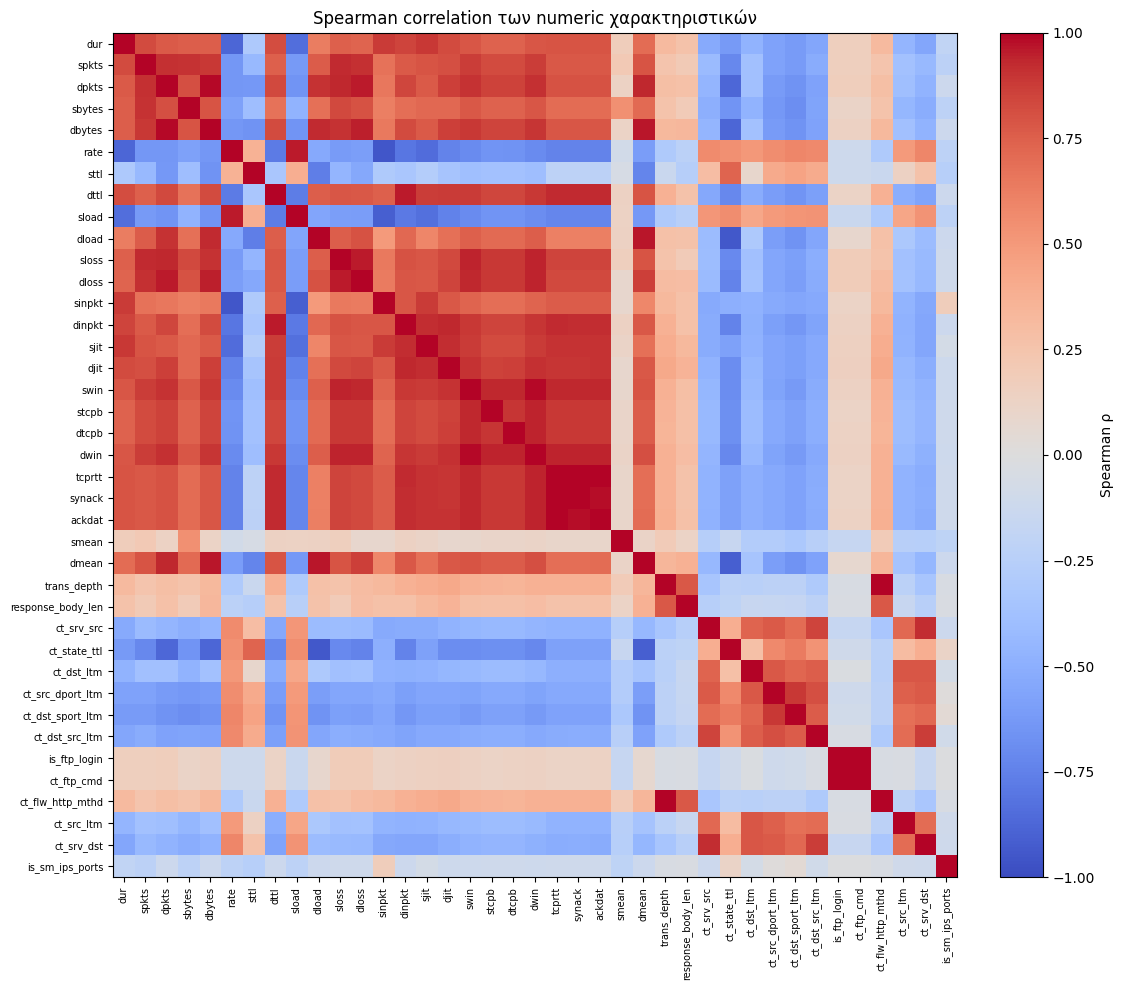

In [ ]:
# Επιλογή των numeric features
numeric_cols = training_data.select_dtypes(include=["number"]).columns

# Aποκλεισμός του Label απο την συσχέτηση
numeric_cols = numeric_cols.drop("label", errors="ignore")
corr_spearman = training_data[numeric_cols].corr(method="spearman")
plt.figure(figsize=(12, 10))

# Εμφάνιση του correlation heatmap
im = plt.imshow(corr_spearman, cmap="coolwarm", vmin=-1, vmax=1)

plt.colorbar(im, fraction=0.046, pad=0.04, label="Spearman ρ")
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=90, fontsize=7)
plt.yticks(range(len(numeric_cols)), numeric_cols, fontsize=7)
plt.title("Spearman correlation των numeric χαρακτηριστικών")
plt.tight_layout()
plt.show()

In [ ]:
# Επιλογή των συσχετίσεων κάθε χαρακτηριστικού
upper = corr_spearman.where(np.triu(np.ones(corr_spearman.shape), k=1).astype(bool))

# Επιλογή χαρακτηριστικών με correlation > 0.99
to_drop = [col for col in upper.columns if any(upper[col].abs() > 0.99)]
print("Θα αφαιρεθούν:", to_drop)

# Διαγραφή αυτών των features απο το Train & Test Dataset
training_data = training_data.drop(columns=to_drop)
test_data  = test_data.drop(columns=to_drop)

Θα αφαιρεθούν: ['dwin', 'synack', 'ackdat', 'ct_ftp_cmd', 'ct_flw_http_mthd']


## **Κωδικοποίηση σε ποσοτικές τιμές 0,1,... τους χαρακτήρες των χαρακτηριστικών "proto", "service" & "state"**

###Η κωδικοποίηση αυτή γίνεται προκειμένου τα categorical features να μετατραπούν σε numerical feaures

In [ ]:
# Δημιουργία τριών OneHotEncoder με χειρισμό άγνωστων κατηγοριών
ohe_service = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
ohe_proto = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
ohe_state = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit των encoders στα δεδομένα εκπαίδευσης
ohe_service.fit(training_data[['service']])
ohe_proto.fit(training_data[['proto']])
ohe_state.fit(training_data[['state']])

def encode_and_merge(df, col, encoder):
    transformed = encoder.transform(df[[col]])
    new_cols = [f"{col}_{cat}" for cat in encoder.categories_[0]]
    encoded_df = pd.DataFrame(transformed, columns=new_cols, index=df.index)
    return pd.concat([df.drop(columns=[col]), encoded_df], axis=1)

# Εφαρμογή one-hot encoding στα training data
training_data = encode_and_merge(training_data, 'service', ohe_service)
training_data = encode_and_merge(training_data, 'proto', ohe_proto)
training_data = encode_and_merge(training_data, 'state', ohe_state)

# Εφαρμογή one-hot encoding στα test data
test_data = encode_and_merge(test_data, 'service', ohe_service)
test_data = encode_and_merge(test_data, 'proto', ohe_proto)
test_data = encode_and_merge(test_data, 'state', ohe_state)

# Ευθυγράμμιση του test_data με το training_data για τυχόν απώλειες
test_data = test_data.reindex(columns=training_data.columns, fill_value=0)

In [ ]:
training_data.head()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,proto_zero,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no
0,0.121478,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.649902,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.623129,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.681642,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.449454,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test_data.head()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,proto_zero,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no
0,0.000011,2,0,496,0,90909.0902,254,0,180363632.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.000008,2,0,1762,0,125000.0003,254,0,881000000.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.000005,2,0,1068,0,200000.0051,254,0,854400000.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.000006,2,0,900,0,166666.6608,254,0,600000000.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.000010,2,0,2126,0,100000.0025,254,0,850400000.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## **Κανονικοποίηση χαρακτηριστικών με Min-Max**

### O Min-Max scaler μετασχηματίζει τα χαρακτηριστικά έτσι ώστε οι τιμές τους να βρίσκονται στο διάστημα [0,1].

In [ ]:
# Διαχωρισμός των δεδομένων Train & Test σε χαρακτηριστικά και ετικέτες
X_train = training_data.drop('label', axis=1)
y_train = training_data['label']

X_test = test_data.drop('label', axis=1)
y_test = test_data['label']

In [ ]:
X_train.head()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,proto_zero,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no
0,0.121478,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.649902,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.623129,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.681642,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.449454,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Αρχικοποίηση του Min-Max Scaler
scaler = MinMaxScaler()

# Κανονικοποίηση των δεδομένων ώστε οι τιμές να είναι μεταξύ 0 και 1
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

# Προβολή των πρώτων γραμμών μετά την κανονικοποίηση
X_train.head()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,proto_zero,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no
0,0.002025,0.000520,0.000364,0.000018,0.000012,0.000074,0.988235,1.000000,2.364553e-06,0.000379,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.010832,0.001352,0.003463,0.000054,0.002867,0.000078,0.243137,0.992126,1.401989e-06,0.022458,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.027052,0.000728,0.001458,0.000026,0.000900,0.000014,0.243137,0.992126,2.625704e-07,0.002717,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.028027,0.001144,0.001093,0.000046,0.000053,0.000014,0.243137,0.992126,4.576117e-07,0.000150,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.007491,0.000936,0.000547,0.000039,0.000018,0.000033,0.996078,0.992126,1.429776e-06,0.000178,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## **Αποθήκευση των προεπεξεργασμένων δεδομένων**

In [ ]:
# Ορισμός διαδρομής αποθήκευσης του τελικού Dataset
training_path = "/content/gdrive/MyDrive/5G/Train/"
test_path = "/content/gdrive/MyDrive/5G/Test/"

# Αποθήκευση των δεδομένων
X_train.to_csv(training_path + "X_train.csv", index=False)
y_train.to_csv(training_path + "y_train.csv", index=False)

X_test.to_csv(test_path + "X_test.csv", index=False)
y_test.to_csv(test_path + "y_test.csv", index=False)

# **Εκπαίδευση XGBOOST**

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import joblib

training_path = "/content/gdrive/MyDrive/5G/Train/"

# Φόρτωση των δεδομένων
X_train = pd.read_csv(training_path + "X_train.csv")
y_train = pd.read_csv(training_path + "y_train.csv")

# Ορισμός XGBOOST
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss',device='cuda')

# Ορισμός υπερπαραμέτρων για Grid Search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': range(1,11,2),
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5],
    'min_child_weight':range(1,5,1)
}

# Grid Search με 10-fold Cross-Validation
#Stratified σημαίνει ότι κάθε fold θα έχει παρόμοια κατανομή κλάσεων με το αρχικό σύνολο.
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=70)
grid_search = GridSearchCV(xgb_model, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)

# Εκπαίδευση
grid_search.fit(X_train, y_train)

# Καλύτερες υπερπαράμετροι
print("Καλύτερες υπερπαράμετροι για το XGBOOST:", grid_search.best_params_)

Καλύτερες υπερπαράμετροι για το XGBOOST: {'learning_rate': 0.2, 'max_depth': 9, 'min_child_weight': 1, 'n_estimators': 200}


In [ ]:
# Αποθήκευση του καλύτερου μοντέλου
model_path = "/content/gdrive/MyDrive/5G/best_xgboost_model.pkl"
joblib.dump(grid_search.best_estimator_, model_path)

print(f"Το μοντέλο αποθηκεύτηκε στη διαδρομή: {model_path}")

Το μοντέλο αποθηκεύτηκε στη διαδρομή: /content/gdrive/MyDrive/5G/best_xgboost_model.pkl


# **Εκπαίδευση MLP**

In [ ]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import joblib

training_path = "/content/gdrive/MyDrive/5G/Train/"

# Φόρτωση των δεδομένων
X_train = pd.read_csv(training_path + "X_train.csv")
y_train = pd.read_csv(training_path + "y_train.csv")

# Ορισμός MLP
mlp_model = MLPClassifier(early_stopping=True, n_iter_no_change=5,verbose=True, max_iter=100)

# Ορισμός υπερπαραμέτρων για Grid Search
param_grid_mlp = {
    'hidden_layer_sizes': [(64, 32, 16), (128, 64, 32), (128, 64),(64, 32)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'alpha': [0.001, 0.01, 0.1]
}

# Grid Search με 10-fold Cross-Validation
#Stratified σημαίνει ότι κάθε fold θα έχει παρόμοια κατανομή κλάσεων με το αρχικό σύνολο.
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=70)
grid_search_mlp = GridSearchCV(mlp_model, param_grid_mlp, cv=cv, scoring='accuracy', n_jobs=-1)

# Εκπαίδευση
grid_search_mlp.fit(X_train, y_train)

# Καλύτερες υπερπαράμετροι
print("Καλύτερες υπερπαράμετροι για το MLP:", grid_search_mlp.best_params_)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.15923622
Validation score: 0.934474
Iteration 2, loss = 0.12634199
Validation score: 0.938979
Iteration 3, loss = 0.12273899
Validation score: 0.938067
Iteration 4, loss = 0.12107639
Validation score: 0.940975
Iteration 5, loss = 0.11967678
Validation score: 0.938580
Iteration 6, loss = 0.11882310
Validation score: 0.940633
Iteration 7, loss = 0.11812063
Validation score: 0.940747
Iteration 8, loss = 0.11752687
Validation score: 0.938979
Iteration 9, loss = 0.11681537
Validation score: 0.939036
Iteration 10, loss = 0.11646322
Validation score: 0.941203
Iteration 11, loss = 0.11547801
Validation score: 0.941831
Iteration 12, loss = 0.11485143
Validation score: 0.943028
Iteration 13, loss = 0.11522291
Validation score: 0.943370
Iteration 14, loss = 0.11433670
Validation score: 0.942401
Iteration 15, loss = 0.11388867
Validation score: 0.945480
Iteration 16, loss = 0.11326120
Validation score: 0.943941
Iteration 17, loss = 0.11295611
Validation score: 0.944625
Iterat

In [ ]:
# Αποθήκευση του καλύτερου μοντέλου
model_path = "/content/gdrive/MyDrive/5G/best_mlp_model.pkl"
joblib.dump(grid_search_mlp.best_estimator_, model_path)

print(f"Το μοντέλο αποθηκεύτηκε στη διαδρομή: {model_path}")

Το μοντέλο αποθηκεύτηκε στη διαδρομή: /content/gdrive/MyDrive/5G/best_mlp_model.pkl


# **Explainability**

## Explainability για το XGBOOST

In [ ]:
import os
import joblib
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Eισαγωγή του μοντέλου και των δεδομένων
xgboost_model = "/content/gdrive/MyDrive/5G/best_xgboost_model.pkl"
test_data = "/content/gdrive/MyDrive/5G/Test/X_test.csv"
OUT_DIR = "/content/gdrive/MyDrive/5G/Explainability_for_XGBOOST"
os.makedirs(OUT_DIR, exist_ok=True)

loaded_model = joblib.load(xgboost_model)
X_test = pd.read_csv(test_data)
# Μείωση του X test για να επιταχύνουμε τα calculation
X_test = shap.utils.sample(X_test, 1000)

# Υπολογισμός των shap values του XGBOOST
explainer = shap.TreeExplainer(loaded_model)
shap_values_xgb = explainer(X_test)

# Σε κάθε plot εμφανίζονται τα πρώτα 20 Features
# Bar plot
shap.plots.bar(shap_values_xgb, max_display=20, show=False)
plt.tight_layout()
plt.savefig(f"{OUT_DIR}/bar_XGBOOST.png", dpi=300, bbox_inches="tight")
plt.close()

# Beeswarm plot
shap.plots.beeswarm(shap_values_xgb, max_display=20, show=False)
plt.tight_layout()
plt.savefig(f"{OUT_DIR}/beeswarm_XGBOOST.png", dpi=300, bbox_inches="tight")
plt.close()

# Waterfall για το δείγμα με μέγιστη πιθανότητα attack
proba = loaded_model.predict_proba(X_test)[:, 1]
idx = int(np.argmax(proba))
shap.plots.waterfall(shap_values_xgb[idx], max_display=20, show=False)
plt.tight_layout()
plt.savefig(f"{OUT_DIR}/waterfall1_XGBOOST.png", dpi=300, bbox_inches="tight")
plt.close()

# Waterfall για το δείγμα με ελάχιστη πιθανότητα attack
idx = int(np.argmin(proba))
shap.plots.waterfall(shap_values_xgb[idx], max_display=20, show=False)
plt.tight_layout()
plt.savefig(f"{OUT_DIR}/waterfall2_XGBOOST.png", dpi=300, bbox_inches="tight")
plt.close()

print("Τα Plots αποθηκεύτηκαν στο κατάλληλο αρχείο")

Τα Plots αποθηκεύτηκαν στο κατάλληλο αρχείο


## Explainability για το MLP

In [ ]:
import os
import joblib
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Eισαγωγή του μοντέλου και των δεδομένων
mlp_model = "/content/gdrive/MyDrive/5G/best_mlp_model.pkl"
test_data = "/content/gdrive/MyDrive/5G/Test/X_test.csv"
OUT_DIR    = "/content/gdrive/MyDrive/5G/Explainability_for_MLP"
os.makedirs(OUT_DIR, exist_ok=True)

loaded_model = joblib.load(mlp_model)
X_test_full = pd.read_csv(test_data)
# background για SHAP
background = shap.utils.sample(X_test_full, 100)
# Μείωση του X test για να επιταχύνουμε τα calculation
X_test = shap.utils.sample(X_test_full, 1000)

# Υπολογισμός των shap values του MLP
explainer = shap.KernelExplainer(loaded_model.predict, background)
shap_values = explainer(X_test)

# Σε κάθε plot εμφανίζονται τα πρώτα 20 Features
# Bar plot
shap.plots.bar(shap_values, max_display=20, show=False)
plt.tight_layout()
plt.savefig(f"{OUT_DIR}/bar_MLP.png", dpi=300, bbox_inches="tight")
plt.close()

# Beeswarm plot
shap.plots.beeswarm(shap_values, max_display=20, show=False)
plt.tight_layout()
plt.savefig(f"{OUT_DIR}/beeswarm_MLP.png", dpi=300, bbox_inches="tight")
plt.close()

# Waterfall για το δείγμα με μέγιστη πιθανότητα attack
proba = loaded_model.predict_proba(X_test)[:, 1]
idx_max = int(np.argmax(proba))
shap.plots.waterfall(shap_values[idx_max], max_display=20, show=False)
plt.tight_layout()
plt.savefig(f"{OUT_DIR}/waterfall1_MLP.png", dpi=300, bbox_inches="tight")
plt.close()

# Waterfall για το δείγμα με ελάχιστη πιθανότητα attack
idx_min = int(np.argmin(proba))
shap.plots.waterfall(shap_values[idx_min], max_display=20, show=False)
plt.tight_layout()
plt.savefig(f"{OUT_DIR}/waterfall2_MLP.png",dpi=300, bbox_inches="tight")
plt.close()

print("Τα Plots αποθηκεύτηκαν στο κατάλληλο αρχείο")

  0%|          | 0/1000 [00:00<?, ?it/s]

Τα Plots αποθηκεύτηκαν στο κατάλληλο αρχείο


# **Αξιολόγηση Μοντέλων**

## Αξιολόγηση XGBOOST μοντέλου

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:54:31] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


XGBOOST Accuracy: 0.8118
XGBOOST Precision: 0.7505
XGBOOST Recall: 0.9860
XGBOOST F1-score: 0.8523
XGBOOST ROC AUC: 0.9668


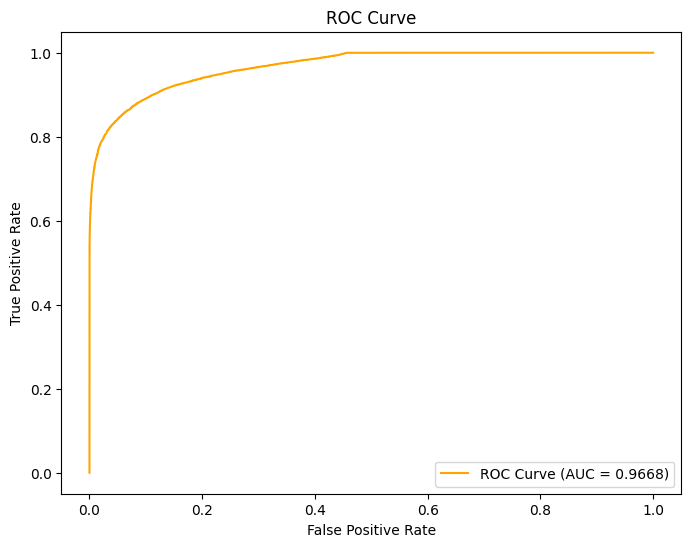

In [ ]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

test_path = "/content/gdrive/MyDrive/5G/Test/"

# Φόρτωση των δεδομένων
X_test = pd.read_csv(test_path + "X_test.csv")
y_test = pd.read_csv(test_path + "y_test.csv")

# Φόρτωση του XGBOOST
xgboost_model = joblib.load("/content/gdrive/MyDrive/5G/best_xgboost_model.pkl")

# Πρόβλεψη του μοντέλου
y_pred_xgb = xgboost_model.predict(X_test)
y_prob_xgb = xgboost_model.predict_proba(X_test)[:, 1]  # Δεδομένα για το ROC AUC (πιθανότητες)

# Υπολογισμός metrics
accuracy_xgboost = accuracy_score(y_test, y_pred_xgb)
precision_xgboost = precision_score(y_test, y_pred_xgb)
recall_xgboost = recall_score(y_test, y_pred_xgb)
f1_xgboost = f1_score(y_test, y_pred_xgb)
roc_auc_xgboost = roc_auc_score(y_test, y_prob_xgb)

# Εμφάνιση αποτελεσμάτων
print(f"XGBOOST Accuracy: {accuracy_xgboost:.4f}")
print(f"XGBOOST Precision: {precision_xgboost:.4f}")
print(f"XGBOOST Recall: {recall_xgboost:.4f}")
print(f"XGBOOST F1-score: {f1_xgboost:.4f}")
print(f"XGBOOST ROC AUC: {roc_auc_xgboost:.4f}")

# Σχεδίαση ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label=f'ROC Curve (AUC = {roc_auc_xgboost:.4f})')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

## Αξιολόγηση MLP μοντέλου

MLP Accuracy: 0.8730
MLP Precision: 0.8199
MLP Recall: 0.9859
MLP F1-score: 0.8953
MLP ROC AUC: 0.9789


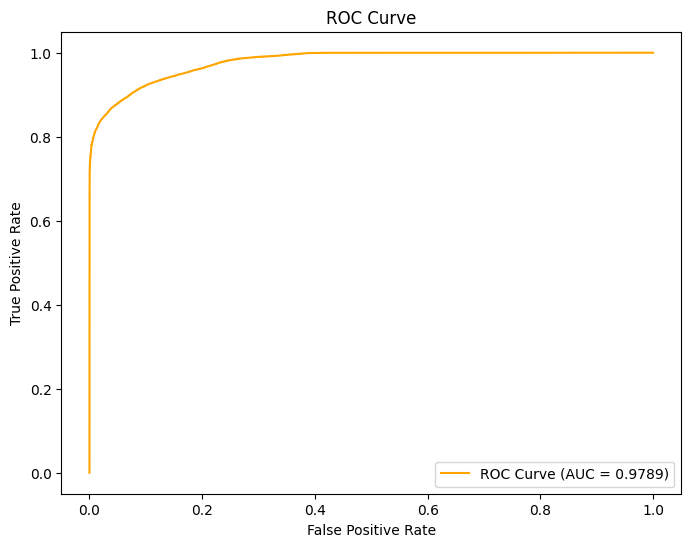

In [ ]:
# Φόρτωση του MLP
MLP_model = joblib.load("/content/gdrive/MyDrive/5G/best_mlp_model.pkl")

# Πρόβλεψη του μοντέλου
y_pred_mlp = MLP_model.predict(X_test)
y_prob_mlp = MLP_model.predict_proba(X_test)[:, 1]

# Υπολογισμός metrics
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
precision_mlp = precision_score(y_test, y_pred_mlp)
recall_mlp = recall_score(y_test, y_pred_mlp)
f1_mlp = f1_score(y_test, y_pred_mlp)
roc_auc_mlp = roc_auc_score(y_test, y_prob_mlp)

# Εμφάνιση αποτελεσμάτων
print(f"MLP Accuracy: {accuracy_mlp:.4f}")
print(f"MLP Precision: {precision_mlp:.4f}")
print(f"MLP Recall: {recall_mlp:.4f}")
print(f"MLP F1-score: {f1_mlp:.4f}")
print(f"MLP ROC AUC: {roc_auc_mlp:.4f}")

# Σχεδίαση ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_mlp)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label=f'ROC Curve (AUC = {roc_auc_mlp:.4f})')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Νέα εκπαίδευση του XGBOOST στα τοπ 20 χαρακτηριστικά και με τις καλύτερες υπερπαραμέτρους του

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import joblib

training_path = "/content/gdrive/MyDrive/5G/Train/"

# Φόρτωση των δεδομένων
X_train = pd.read_csv(training_path + "X_train.csv")
y_train = pd.read_csv(training_path + "y_train.csv")

# Τα καλύτερα 20 features με βάση το explainability για το XGBOOST
selected_features = ['sttl', 'ct_dst_sport_ltm', 'service_dns', 'ct_state_ttl','sbytes','ct_srv_dst'\
                     ,'smean','ct_dst_src_ltm','ct_srv_src','dbytes','tcprtt',\
                     'ct_src_ltm','dmean','proto_udp','dload','stcpb','sjit','sinpkt','rate']
X_train = X_train[selected_features]

# Ορισμός XGBOOST με καλύτερες υπερπαραμέτρους
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    device='cuda',
    learning_rate=0.2,
    max_depth=9,
    min_child_weight=1,
    n_estimators=200,
    random_state=70
)

# Εκπαίδευση του μοντέλου
xgb_model.fit(X_train, y_train)

# Αποθήκευση του εκπαιδευμένου μοντέλου
model_path = "/content/gdrive/MyDrive/5G/xgboost_explainability.pkl"
joblib.dump(xgb_model, model_path)

print(f"Το μοντέλο αποθηκεύτηκε στη διαδρομή: {model_path}")

Το μοντέλο αποθηκεύτηκε στη διαδρομή: /content/gdrive/MyDrive/5G/xgboost_explainability.pkl


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:54:44] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


XGBOOST Accuracy: 0.8309
XGBOOST Precision: 0.7725
XGBOOST Recall: 0.9821
XGBOOST F1-score: 0.8648
XGBOOST ROC AUC: 0.9679


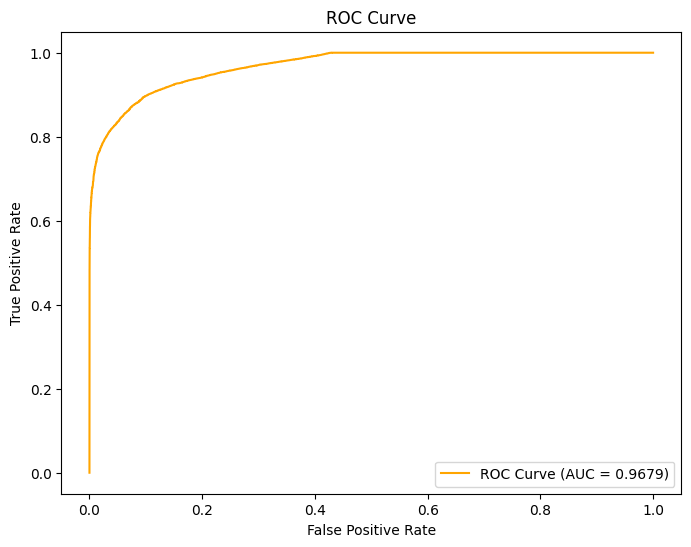

In [ ]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

test_path = "/content/gdrive/MyDrive/5G/Test/"

# Φόρτωση των δεδομένων
X_test = pd.read_csv(test_path + "X_test.csv")
y_test = pd.read_csv(test_path + "y_test.csv")

# Τα καλύτερα 20 features με βάση το explainability για το XGBOOST
selected_features = ['sttl', 'ct_dst_sport_ltm', 'service_dns', 'ct_state_ttl','sbytes','ct_srv_dst'\
                     ,'smean','ct_dst_src_ltm','ct_srv_src','dbytes','tcprtt',\
                     'ct_src_ltm','dmean','proto_udp','dload','stcpb','sjit','sinpkt','rate']
X_test = X_test[selected_features]

# Φόρτωση του XGBOOST
xgboost_model = joblib.load("/content/gdrive/MyDrive/5G/xgboost_explainability.pkl")

# Πρόβλεψη του μοντέλου
y_pred_xgb = xgboost_model.predict(X_test)
y_prob_xgb = xgboost_model.predict_proba(X_test)[:, 1]  # Δεδομένα για το ROC AUC (πιθανότητες)

# Υπολογισμός metrics
accuracy_xgboost = accuracy_score(y_test, y_pred_xgb)
precision_xgboost = precision_score(y_test, y_pred_xgb)
recall_xgboost = recall_score(y_test, y_pred_xgb)
f1_xgboost = f1_score(y_test, y_pred_xgb)
roc_auc_xgboost = roc_auc_score(y_test, y_prob_xgb)

# Εμφάνιση αποτελεσμάτων
print(f"XGBOOST Accuracy: {accuracy_xgboost:.4f}")
print(f"XGBOOST Precision: {precision_xgboost:.4f}")
print(f"XGBOOST Recall: {recall_xgboost:.4f}")
print(f"XGBOOST F1-score: {f1_xgboost:.4f}")
print(f"XGBOOST ROC AUC: {roc_auc_xgboost:.4f}")

# Σχεδίαση ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label=f'ROC Curve (AUC = {roc_auc_xgboost:.4f})')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Νέα εκπαίδευση του MLP στα τοπ 20 χαρακτηριστικά και με τις καλύτερες υπερπαραμέτρους του

In [ ]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
import joblib

training_path = "/content/gdrive/MyDrive/5G/Train/"

# Φόρτωση των δεδομένων
X_train = pd.read_csv(training_path + "X_train.csv")
y_train = pd.read_csv(training_path + "y_train.csv")

# Τα καλύτερα 20 features με βάση το explainability για το MLP
selected_features = ['dttl','sttl','swin','proto_tcp','ct_state_ttl','ct_srv_dst','state_CON','service_dns',\
                     'ct_dst_src_ltm','dmean','state_FIN','proto_udp','state_INT','ct_dst_ltm','dload',\
                     'proto_arp','ct_src_dport_ltm','ct_dst_sport_ltm','ct_srv_src']
X_train = X_train[selected_features]

# Ορισμός MLP με καλύτερες υπερπαραμέτρους
mlp_model = MLPClassifier(
    hidden_layer_sizes=(128, 64, 32),
    activation='relu',
    solver='adam',
    learning_rate_init=0.001,
    alpha=0.001,
    early_stopping=True,
    n_iter_no_change=5,
    verbose=True,
    max_iter=100,
    random_state=70
)

# Εκπαίδευση του μοντέλου
mlp_model.fit(X_train, y_train)

# Αποθήκευση του μοντέλου
model_path = "/content/gdrive/MyDrive/5G/mlp_explainability.pkl"
joblib.dump(mlp_model, model_path)

print(f"Το μοντέλο αποθηκεύτηκε στη διαδρομή: {model_path}")

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.16457889
Validation score: 0.934759
Iteration 2, loss = 0.13502965
Validation score: 0.935672
Iteration 3, loss = 0.13190081
Validation score: 0.936356
Iteration 4, loss = 0.13033375
Validation score: 0.928258
Iteration 5, loss = 0.12871512
Validation score: 0.937496
Iteration 6, loss = 0.12748533
Validation score: 0.936926
Iteration 7, loss = 0.12646248
Validation score: 0.937325
Iteration 8, loss = 0.12563849
Validation score: 0.937040
Iteration 9, loss = 0.12464407
Validation score: 0.937610
Iteration 10, loss = 0.12390589
Validation score: 0.938124
Iteration 11, loss = 0.12362269
Validation score: 0.937782
Iteration 12, loss = 0.12292663
Validation score: 0.936755
Iteration 13, loss = 0.12231947
Validation score: 0.938637
Iteration 14, loss = 0.12216585
Validation score: 0.936812
Iteration 15, loss = 0.12154506
Validation score: 0.938295
Iteration 16, loss = 0.12133670
Validation score: 0.937553
Iteration 17, loss = 0.12094005
Validation score: 0.938466
Iterat

MLP Accuracy: 0.8535
MLP Precision: 0.7964
MLP Recall: 0.9858
MLP F1-score: 0.8811
MLP ROC AUC: 0.9743


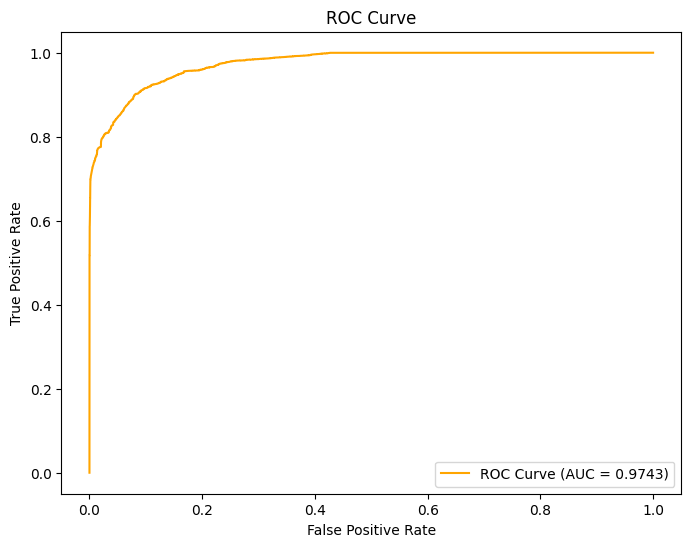

In [ ]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

test_path = "/content/gdrive/MyDrive/5G/Test/"

# Φόρτωση των δεδομένων
X_test = pd.read_csv(test_path + "X_test.csv")
y_test = pd.read_csv(test_path + "y_test.csv")

# Τα καλύτερα 20 features με βάση το explainability για το MLP
selected_features = ['dttl','sttl','swin','proto_tcp','ct_state_ttl','ct_srv_dst','state_CON','service_dns',\
                     'ct_dst_src_ltm','dmean','state_FIN','proto_udp','state_INT','ct_dst_ltm','dload',\
                     'proto_arp','ct_src_dport_ltm','ct_dst_sport_ltm','ct_srv_src']
X_test = X_test[selected_features]

# Φόρτωση του MLP
MLP_model = joblib.load("/content/gdrive/MyDrive/5G/mlp_explainability.pkl")

# Πρόβλεψη του μοντέλου
y_pred_mlp = MLP_model.predict(X_test)
y_prob_mlp = MLP_model.predict_proba(X_test)[:, 1]

# Υπολογισμός metrics
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
precision_mlp = precision_score(y_test, y_pred_mlp)
recall_mlp = recall_score(y_test, y_pred_mlp)
f1_mlp = f1_score(y_test, y_pred_mlp)
roc_auc_mlp = roc_auc_score(y_test, y_prob_mlp)

# Εμφάνιση αποτελεσμάτων
print(f"MLP Accuracy: {accuracy_mlp:.4f}")
print(f"MLP Precision: {precision_mlp:.4f}")
print(f"MLP Recall: {recall_mlp:.4f}")
print(f"MLP F1-score: {f1_mlp:.4f}")
print(f"MLP ROC AUC: {roc_auc_mlp:.4f}")

# Σχεδίαση ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_mlp)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label=f'ROC Curve (AUC = {roc_auc_mlp:.4f})')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()